### Aim - Understanding the severity of accidents in Victoria, Australia using DBSCAN and HBSCAN alogorithms.

Clustering the accidents based on their positions with the help of DBSCAN and HBSCAN, the two most important algorithms to group spatial data. DBSCAN and HBSCAN algorithms work slightly differently. 

DBSCAN is a density based algorithm – it assumes clusters for dense regions. It only extracts the dense clusters and classifies the sparse points as 'noise'. It takes 'distance'(epsilon) and 'minimum number of neighbours' as it's parameters to form clusters.

HBSCAN, on the other hand, clusters the data points based on it's density and only takes 'minimum cluster size' as it's parameters. This can work well with varying density clusters and we don't need to specift the 'epsilon' parameter.

In [54]:
#Import packages

from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hdbscan

In [55]:
#reading csv file into a dataframe

acc1 = pd.read_csv("ACCIDENTS_AND_NP.csv", index_col = 0)

In [56]:
acc1.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,DIRECTORY,...,NODE_TYPE,AMG_X,AMG_Y,LG_AREA_NAME,REGION_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE,NEAREST_NATIONAL_PARK_NAME
0,22000004456,22/01/00,07.58.00,3,Struck animal,7,Saturday,167,STRUCK ANIMAL,VCS,...,N,2346829.190,2364510.193,CORANGAMITE,SOUTH WESTERN REGION,RURAL_VICTORIA,-38.20817,143.25117,3260,Port Campbell National Park
1,22000005220,04/02/00,22.00.00,3,Struck animal,6,Friday,167,STRUCK ANIMAL,VCS,...,N,2388077.136,2308834.392,COLAC OTWAY,SOUTH WESTERN REGION,RURAL_VICTORIA,-38.71550,143.71346,3233,Great Otway National Park
2,22000005532,06/02/00,22.00.00,3,Struck animal,1,Sunday,167,STRUCK ANIMAL,VCS,...,N,2259985.965,2401993.249,SOUTHERN GRAMPIANS,SOUTH WESTERN REGION,RURAL_VICTORIA,-37.85217,142.27234,3289,Mount Eccles National Park
3,22000007624,20/02/00,00.15.00,3,Struck animal,1,Sunday,167,STRUCK ANIMAL,VCS,...,N,2415145.140,2380906.853,GOLDEN PLAINS,SOUTH WESTERN REGION,RURAL_VICTORIA,-38.06925,144.03300,3321,Brisbane Ranges National Park
4,22000009094,07/03/00,05.45.00,3,Struck animal,3,Tuesday,167,STRUCK ANIMAL,MEL,...,N,2443237.245,2386011.780,GEELONG,SOUTH WESTERN REGION,RURAL_VICTORIA,-38.02540,144.35352,3212,Brisbane Ranges National Park


Text(0, 0.5, 'Longitude')

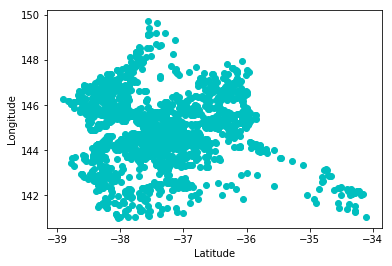

In [57]:
#Plot showing the accident spots in Victoria, Australia

plt.scatter(acc1['LATITUDE'], acc1['LONGITUDE'], color='c')
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [58]:
acc1.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X',
       'GRID_REFERENCE_Y', 'LIGHT_CONDITION', 'LIGHT_CONDITION_DESC',
       'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
       'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ', 'POLICE_ATTEND',
       'ROAD_GEOMETRY', 'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE',
       'NODE_ID', 'NODE_TYPE', 'AMG_X', 'AMG_Y', 'LG_AREA_NAME', 'REGION_NAME',
       'DEG_URBAN_NAME', 'LATITUDE', 'LONGITUDE', 'POSTCODE',
       'NEAREST_NATIONAL_PARK_NAME'],
      dtype='object')

In [59]:
#Total records in our dataset
len(acc1)

2016

In [60]:
#Total number of suburbs in our open dataset
num_suburb = len(set(acc1['LG_AREA_NAME']))
print(num_suburb)

61


In [61]:
#Average number of incidents per suburb
len(acc1)/num_suburb

33.049180327868854

In [62]:
#DBSCAN implementation to cluster accident spots with minimum samples 5 and with 2 km radius

points = np.array(acc1.iloc[:, 34:36].values)
db = DBSCAN(eps=2/6371., min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(points))


In [63]:
#Total clusters formed

cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
print("The number of clusters formed: ", num_clusters)

The number of clusters formed:  17


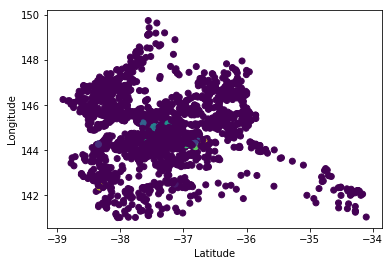

In [64]:
#Plot showing the clusters formed

plt.scatter(acc1['LATITUDE'], acc1['LONGITUDE'], c=cluster_labels)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

The number of clusters formed:  30


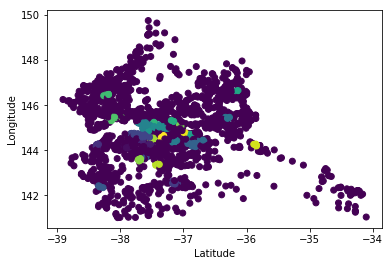

In [65]:
#DBSCAN implementation to cluster accident spots with minimum samples 7 within 5 km radius


db2 = DBSCAN(eps=5/6371., min_samples=7, algorithm='ball_tree', metric='haversine').fit(np.radians(points))
cluster_labels2 = db2.labels_
num_clusters = len(set(cluster_labels2))
print("The number of clusters formed: ", num_clusters)

plt.scatter(acc1['LATITUDE'], acc1['LONGITUDE'], c=cluster_labels2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [68]:
#HBSCAN implementation to cluster accident spots occurring within 10 km radius

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='haversine')
cluster_labels3 = clusterer.fit_predict(points)
num_clusters = len(set(cluster_labels3))
print("The number of clusters formed: ", num_clusters)

The number of clusters formed:  35


Text(0, 0.5, 'Longitude')

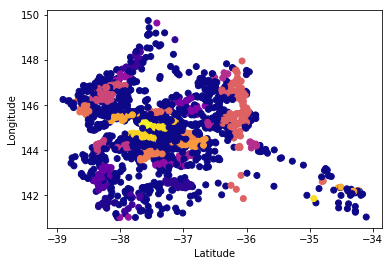

In [67]:
#Figure showing the clusters formed by HBSCAN

plt.scatter(acc1['LATITUDE'], acc1['LONGITUDE'], c=cluster_labels3, cmap="plasma")
plt.xlabel("Latitude")
plt.ylabel("Longitude")